In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

In [2]:
BASE_BFS=0.169707
BASE_SSSP=0.290947
bfs_pang_hawk=0.385745
bfs_fm_hawk=0.402416
bfs_fm_mj=0.404577
bfs_pang_mj=0.43354

In [3]:
bfs_fm_repl={"fifo":0.395115, "lfu":0.396449, "mockingjay":0.404577,"random":0.396601,"ship":0.402946, 
             "mru":0.394148, "srrip":0.399262 , "hawk": 0.402416, "lru": 0.398455,
               "drrip":0.397157  }
bfs_hierarchy={"inclusive":0.25234, "exclusive":0.366644, "non-inclusive":0.402416}
bfs_pref_mj={"berti":  0.383126, "bop_fm":0.404577, "ipcp":0.402819, "next line":0.354392, "pangloss":0.43354, 
             "sangam":0.404559, "team12": 0.39047, "tskid": 0.392695}
bfsfm_hawk={"Base":bfs_fm_hawk,"2-0.5":0.402583,"4-0.25":0.402985, "8-0.125": 0.402084}

#### SSSP Plots

In [11]:
sssp_pang_repl={"fifo":0.332192, "lfu":0.382017, "mockingjay":0.382324,"random":0.335603,"ship":0.371643, 
             "srrip":0.353382 , "hawk":0.363023 , "lru": 0.340736, "drrip":0.382313, "mru":0.278608 }
sssp_fm_repl={"fifo":0.339045, "lfu":0.387745, "mockingjay":0.391091,"random":0.342352,"ship":0.377889, 
             "srrip":0.361247 , "hawk": 0.365469, "lru": 0.347033, "drrip":0.390526, "mru":0.286482 }
sssp_hierarchy={"inclusive":0.339743 , "exclusive":0.349369, "non-inclusive":0.365469}
ssspfm_hawk={"Base":sssp_fm_repl["hawk"],"2-0.5": 0.367718,"4-0.25":0.303698, "8-0.125": 0.287845}


In [387]:
plt.figure(figsize=(8,5))
obj1=sssp_pang_repl
obj={k:v for k,v in sorted(obj1.items(), key=lambda item: item[1])}
num_bars=len(obj1)
gradient_range = np.linspace(0.3, 1, num_bars)
colors = plt.cm.Blues(gradient_range)
cmap = mcolors.ListedColormap(colors)
y=np.array(list(obj.values()))/BASE_SSSP
plt.bar([i for i in range(len(obj))],y, color=cmap(gradient_range))
if(min(y)>0):
    lowerlim=0.9*min(y)
else:
    lowerlim=1.1*min(y)
plt.ylim(lowerlim,1.1*max(y))
plt.xlabel("Replacement Policies")
plt.ylabel("Relative Speedup")
plt.xticks([i for i in range(num_bars)], obj.keys())
plt.title("SSSP-14 Trace with Pangloss Prefetcher")
plt.savefig("sssp_pang_repl.jpg",dpi=200)
plt.close()
;


''

In [388]:
plt.figure(figsize=(8,5))
obj1=sssp_fm_repl
obj={k:v for k,v in sorted(obj1.items(), key=lambda item: item[1])}
num_bars=len(obj1)
gradient_range = np.linspace(0.3, 1, num_bars)
colors = plt.cm.Blues(gradient_range)
cmap = mcolors.ListedColormap(colors)
y=np.array(list(obj.values()))/BASE_SSSP
plt.bar([i for i in range(len(obj))],y, color=cmap(gradient_range))
if(min(y)>0):
    lowerlim=0.9*min(y)
else:
    lowerlim=1.1*min(y)
plt.ylim(lowerlim,1.1*max(y))
plt.xlabel("Replacement Policies")
plt.ylabel("Relative Speedup")
plt.xticks([i for i in range(num_bars)], obj.keys())
plt.title("SSSP-14 Trace with BOP_FM")
plt.savefig("sssp_fm_repl.jpg",dpi=200)
plt.close()
;


''

In [389]:
plt.plot([1,2,3],bfs_hierarchy.values(),'bo')
plt.plot([1,2,3],bfs_hierarchy.values(),'b--')
plt.xlabel("Cache Hierarchy")
plt.ylabel("IPC")
plt.title("BFS 14 Trace")
plt.xticks([1,2,3],bfs_hierarchy.keys())
plt.savefig("hier_bfs.jpg",dpi=200)
plt.close();

In [390]:
plt.plot([1,2,3],sssp_hierarchy.values(),'bo')
plt.plot([1,2,3],sssp_hierarchy.values(),'b--')
plt.xlabel("Cache Hierarchy")
plt.ylabel("IPC")
plt.title("SSSP 14 Trace")
plt.xticks([1,2,3],bfs_hierarchy.keys())
plt.savefig("sssp_hier.jpg",dpi=200)
plt.close();

In [391]:
plt.figure(figsize=(8,5))
obj1=sssp_pang_repl
obj={k:v for k,v in sorted(obj1.items(), key=lambda item: item[1])}
obj3=sssp_fm_repl
obj2={k:v for k,v in sorted(obj3.items(), key=lambda item: item[1])}
num_bars=len(obj1)
y1=np.array(list(obj.values()))/BASE_SSSP
y2=np.array(list(obj2.values()))/BASE_SSSP
plt.bar([i-0.2 for i in range(len(obj))],y1,0.4, color="orange")
plt.bar([i+0.2 for i in range(len(obj))],y2,0.4, color="blue")
upperlim=max(max(y1),max(y2))
lowerlim=min(min(y1),min(y2))
if(lowerlim>0):
    lowerlim=0.9*lowerlim
else:
    lowerlim=1.1*lowerlim
plt.ylim(lowerlim,1.1*upperlim)
plt.xlabel("Replacement Policies")
plt.ylabel("Relative Speedup")
plt.xticks([i for i in range(num_bars)], obj.keys())
plt.title("SSSP-14 Trace")
plt.legend(["Pangloss","BOP_FM"])
plt.savefig("sssp_pang_fm.jpg",dpi=200)
plt.close()
;


''

In [392]:
plt.figure(figsize=(6.5,5))
plt.plot([1,2,3,4],ssspfm_hawk.values(),'bo')
plt.plot([1,2,3,4],ssspfm_hawk.values(),'b--')
plt.xlabel("LLC Associativity\n(Cache Size is Constant)")
plt.xticks([1,2,3,4],[16,32,64,128])
plt.ylabel("IPC")
plt.title("SSSP 14 BOP_FM Hawkeye")
plt.savefig("sssp_llc_assoc.jpg",dpi=200)
plt.close()
;


''

In [393]:
plt.figure(figsize=(6.5,5))
plt.plot([1,2,3,4],bfsfm_hawk.values(),'bo')
plt.plot([1,2,3,4],bfsfm_hawk.values(),'b--')
plt.xlabel("LLC Associativity\n(Cache Size is Constant)")
plt.xticks([1,2,3,4],[16,32,64,128])
plt.ylabel("IPC")
plt.title("BFS 14 BOP_FM Hawkeye")
plt.savefig("bfs_llc_assoc.jpg",dpi=200)
plt.close()
;


''

#### BFS plot

In [4]:
plt.figure(figsize=(10,5))
obj1=bfs_fm_repl
obj={k:v for k,v in sorted(obj1.items(), key=lambda item: item[1])}
num_bars=len(obj1)
gradient_range = np.linspace(0.3, 1, num_bars)
colors = plt.cm.Blues(gradient_range)
cmap = mcolors.ListedColormap(colors)
y=np.array(list(obj.values()))/BASE_BFS
plt.bar([i for i in range(len(obj))],y, color=cmap(gradient_range))
if(min(y)>0):
    lowerlim=0.999*min(y)
else:
    lowerlim=1.01*min(y)
plt.ylim(lowerlim,1.01*max(y))
plt.xlabel("Replacement Policies")
plt.ylabel("Relative Speedup")
plt.xticks([i for i in range(num_bars)], obj.keys())
plt.title("BFS-14 Trace");
plt.savefig("bfs_fm_repl.jpg",dpi=200)
plt.close()
;


''

In [5]:
plt.figure(figsize=(10,5))
obj1={"berti":  0.383126, "bop":0.404577, "ipcp":0.402819, "next line":0.354392, "pangloss":0.43354, 
             "sangam":0.404559, "spp": 0.39047, "tskid": 0.392695}
obj={k:v for k,v in sorted(obj1.items(), key=lambda item: item[1])}
num_bars=len(obj1)
gradient_range = np.linspace(0.3, 1, num_bars)
colors = plt.cm.Blues(gradient_range)
cmap = mcolors.ListedColormap(colors)
y=np.array(list(obj.values()))/BASE_BFS
plt.bar([i for i in range(len(obj))],y, color=cmap(gradient_range))
if(min(y)>0):
    lowerlim=0.999*min(y)
else:
    lowerlim=1.01*min(y)
plt.ylim(lowerlim,1.01*max(y))
plt.xlabel("Prefetcher Policies")
plt.ylabel("Relative Speedup")
plt.xticks([i for i in range(num_bars)], obj.keys())
plt.title("BFS-14 Trace with Mockingjay Replacement");
plt.savefig("bfs_pref_mj.jpg",dpi=200)
plt.close()
;


''

In [396]:
sssp_fm_mj_way={"Base":0.389391, "L2W16":0.405323,"LLCW32":0.635707, }
sssp_fm_mj_llc_set={"Base":0.389391, "LLCS2":0.631568,"LLCS4":0.721074,"LLCS8":0.726258,  }
sssp_fm_mj_l2_set={"Base":0.389391, "L2S2":0.402733, "L2S4":0.447275}

In [397]:
plt.plot([1,2,3],sssp_fm_mj_l2_set.values(),'bo')
plt.plot([1,2,3],sssp_fm_mj_l2_set.values(),'b--')
plt.xlabel("L2C Set")
plt.ylabel("IPC")
plt.xticks([1,2,3],["Base", 2048, 4096])
plt.title("SSSP 14-BOP_FM-MockingJay")
plt.savefig("sssp_fm_mj_l2_set.jpg",dpi=200)
plt.close();

In [398]:
plt.bar([0.5,1,1.5],sssp_fm_mj_way.values(),width=0.2, color="orange")
# plt.plot([1,2,3],sssp_fm_mj_l2_set.values(),'b--')
plt.xlabel("Associativity")
plt.ylabel("IPC")
plt.xticks([0.5,1,1.5],["L2 8-LLC 16", "L2 16-LLC 16", "L2 8-LLC 32"])
plt.title("SSSP 14-BOP_FM-MockingJay")
plt.ylim(0.35,0.65)
plt.savefig("sssp_fm_mj_way.jpg",dpi=200)
plt.close();

In [399]:
plt.bar([0.5,1,1.5,2],sssp_fm_mj_llc_set.values(),width=0.2, color="orange")
# plt.plot([1,2,3],sssp_fm_mj_l2_set.values(),'b--')
plt.xlabel("LLC Set")
plt.ylabel("IPC")
plt.xticks([0.5,1,1.5,2],[2048,4096,8192,16384])
plt.title("SSSP 14-BOP_FM-MockingJay")
plt.ylim(0.35,0.75)
plt.savefig("sssp_fm_mj_llc_set.jpg",dpi=200)
plt.close();

In [400]:
bfs_fm_mj_size={"LLC*8":0.427754, "LLC*16":0.446, "L2S*8":0.405331, "Base":0.404577}
bfs_bop_comp={"L2-BOP":0.32991,"L2-BOP_FM":0.335558, "BOTH-BOP":0.392052, "BOTH-BOP_FM": 0.398455, "BOTH_BOP_FM56": 0.398225}


In [401]:
plt.figure(figsize=(7,5))
plt.plot([i for i in range(len(bfs_bop_comp))],bfs_bop_comp.values(),'bo')
plt.plot([i for i in range(len(bfs_bop_comp))],bfs_bop_comp.values(),'b--')
plt.xlabel("Prefetcher Policy Variation")
plt.ylabel("IPC")
plt.title("BFS14-LRU-Comparison of BOP")
plt.xticks([i for i in range(len(bfs_bop_comp))],bfs_bop_comp.keys())
plt.savefig("bfs_bop_comp.jpg",dpi=200)
plt.close();


In [402]:
# MAX_RD changed to INF_RD(127) - i
a1={"INF_RD - 1": 0.381734, "DEF=(INF_RD - 22)": 0.382324, "INF_RD - 40": 0.382628, 
"INF_RD - 70": 0.384637, "INF_RD - 100": 0.386057, "INF_RD - 110": 0.38626}

#Penalty factor changed from 2 to i
a2={"1": 0.371677, "DEF=2": 0.382324, "3": 0.386394, "4": 0.386975, "10": 0.390438, "20": 0.390438}

In [403]:
plt.figure(figsize=(6,5))
plt.plot([i for i in range(len(a1))], a1.values(), 'bo')
plt.plot([i for i in range(len(a1))], a1.values(), 'b--')
plt.xlabel("MAX_RD Values")
plt.ylabel("IPC")
plt.xticks([i for i in range(len(a1))], a1.keys(), rotation=90)
plt.title("SSSP 14-Mockingjay-Pangloss")
plt.vlines([i for i in range(len(a1))], [0.381 for i in range(len(a1))],a1.values(), colors="blue")
plt.savefig("inf_rd.jpg",dpi=200, bbox_inches = 'tight')
plt.close();


In [404]:
plt.figure(figsize=(6.5,5))
plt.plot([i for i in range(len(a2))], a2.values(), 'bo')
plt.plot([i for i in range(len(a2))], a2.values(), 'b--')
plt.xlabel("Penalty Factor")
plt.ylabel("IPC")
plt.xticks([i for i in range(len(a2))], a2.keys(), rotation=0)
plt.title("SSSP 14-Mockingjay-Pangloss")
plt.vlines([i for i in range(len(a2))], [0.37 for i in range(len(a2))],a2.values(), colors="blue")
plt.savefig("penalty_fac.jpg",dpi=200)
plt.close();


In [12]:

plt.bar([i-0.2 for i in range(2)],np.array([bfs_pang_hawk,bfs_fm_hawk])/BASE_BFS,0.4)
plt.bar([i+0.2 for i in range(2)],np.array([bfs_pang_mj,bfs_fm_mj])/BASE_BFS,0.4)
plt.xlabel("Prefetcher")
plt.ylabel("Relative Speedup w.r.t Baseline")
plt.title("Hawkeye vs MockingJay & Pangloss vs BOP_FM")
plt.xticks([0,1], ["Pangloss","BOP_FM"])
plt.legend(["Hawkeye", "Mockingjay_OPT"])
plt.ylim(2.2,2.6)
plt.savefig("pang_fm_hawk_mj.jpg",dpi=200)
plt.close();


In [17]:
# a3={ "LLC-2048":0.197543,"LLC-4096":0.198148, "LLC-8192":0.197177, "LLC-16384":0.219054,"LLC-32768": 0.313204,
#     "LLC-2048\nNo L2":0.192131,"LLC-4096\nNo L2":0.19077, "LLC-8192\nNo L2":0.211115,}
a3={ "LLC-2048":0.197543,"LLC-4096":0.198148, "LLC-8192":0.199177, "LLC-16384":0.219054,}
a3={k:v for k,v in sorted(a3.items(), key=lambda item: item[1])}

In [19]:
plt.figure(figsize=(8.5,5))
plt.plot([i for i in range(len(a3))],a3.values(),'bo')
plt.plot([i for i in range(len(a3))],a3.values(),'b--')
plt.vlines([i for i in range(len(a3))], [0.19 for i in range(len(a3))],a3.values(), colors="blue")
plt.xlabel("Sets")
plt.ylabel("IPC")
plt.xticks([i for i in range(len(a3))],a3.keys())
plt.ylim(0.195,0.220)
plt.title("BFS_14-NO_PREF-LRU\nCache Size Variation")
plt.savefig("bfs_cache_size.jpg",dpi=200)
plt.close()
;

''

In [408]:
a4={"FIFO": 0.432449, "LFU": 0.400233, "DEFAULT": 0.432449, "PRE": 0.432927, "MOD": 0.429658}
a5={"FIFO": 0.363604, "LFU": 0.318824, "DEFAULT": 0.363604, "PRE": 0.362127, "MOD": 0.320807}
a4={k:v for k,v in sorted(a4.items(), key=lambda item: item[1])}
a5={k:v for k,v in sorted(a5.items(), key=lambda item: item[1])}

In [409]:
plt.plot([i for i in range(len(a4))],a4.values(),'bo')
plt.plot([i for i in range(len(a4))],a4.values(),'b--')
plt.xticks([i for i in range(len(a4))], a4.keys())
# plt.vlines([i for i in range(len(a4))], [0.39 for i in range(len(a4))],a4.values(), colors="blue")
plt.xlabel("Hawkeye Policy Modification")
plt.ylabel("IPC")
plt.title("BFS 14-Pangloss-Hawkeye")
plt.savefig("hawkeye_mod_bfs.jpg",dpi=200)
plt.close()
;

''

In [410]:
plt.plot([i for i in range(len(a5))],a5.values(),'bo')
plt.plot([i for i in range(len(a5))],a5.values(),'b--')
plt.xticks([i for i in range(len(a5))], a5.keys())
plt.xlabel("Hawkeye Policy Modification")
plt.ylabel("IPC")
plt.title("SSSP 14-Pangloss-Hawkeye")
plt.savefig("hawkeye_mod_sssp.jpg",dpi=200)
plt.close()
;

''

''

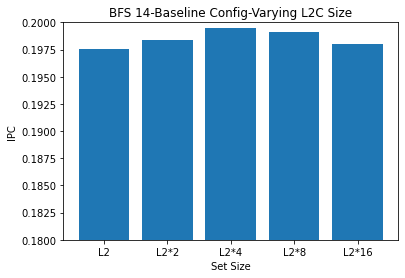

In [3]:
a7={"L2":0.197543,"L2*2":0.198333,"L2*4":0.199515,"L2*8":0.199106,"L2*16":0.198014 }
plt.bar([i for i in range(len(a7))],a7.values())
# plt.plot([i for i in range(len(a7))],a7.values(),'b--')
plt.xticks([i for i in range(len(a7))], a7.keys())
plt.xlabel("Set Size")
plt.ylabel("IPC")
plt.title("BFS 14-Baseline Config-Varying L2C Size")
plt.ylim(0.18,0.2)
plt.savefig("bfs_l2c-set.jpg",dpi=200,bbox_inches="tight")
# plt.close()
;

In [16]:

plt.bar([i-0.2 for i in range(2)],np.array([sssp_fm_repl["mockingjay"],bfs_fm_mj])/BASE_BFS,0.4)
plt.bar([i+0.2 for i in range(2)],np.array([sssp_pang_repl["mockingjay"],bfs_pang_mj])/BASE_BFS,0.4)
plt.xlabel("Traces")
plt.ylabel("Relative Speedup w.r.t Baseline")
plt.title("Pangloss vs BOP_FM\nMockingJay_OPT replacement used")
plt.xticks([0,1], ["BFS-14","SSSP-14"])
plt.legend(["BOP_FM", "Pangloss"])
plt.ylim(2.2,2.6)
plt.savefig("conc.jpg",dpi=200,bbox_inches="tight")
plt.close();
;


''